This note book is to compare the Hessian and Evolution experiment pairs on some basic levels, making sure that they are indeed comparable.
* Baseline response in Hessian vs Baseline response in Evolution
* Response at origin in Hessian vs Response at last block in Evolution
* Response at max block in Hessian vs Response at max block in Evolution
* Response at max block in Hessian vs Response at max block in Evolution + Reference


In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import os
from os.path import join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from core.utils.plot_utils import saveallforms
import seaborn as sns
from core.utils.plot_utils import saveallforms

c:\Users\ponce\.conda\envs\torch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
figroot = r"E:\OneDrive - Harvard University\BigGAN_Hessian"
syndir = join(figroot, "synopsis")
synfigdir = f"E:\OneDrive - Harvard University\BigGAN_Hessian\synopsis\Figure"
tuning_stats_synopsis_df = pd.read_pickle(join(syndir, f"ABCD_tuning_stats_synopsis.pkl"))
tuning_stats_synopsis_df_fillmissing = pd.read_pickle(join(syndir, f"ABCD_tuning_stats_synopsis_fill_missing.pkl"))
evol_stats_synopsis_df = pd.read_pickle(join(syndir, f"ABCD_evol_stats_synopsis.pkl"))

In [ ]:
tuning_stats_synopsis_df = tuning_stats_synopsis_df_fillmissing

In [ ]:
tuning_stats_synopsis_df['eig_id'] = tuning_stats_synopsis_df['eig_id'].astype(int)
tuning_stats_synopsis_df['Exp_id'] = tuning_stats_synopsis_df.apply(lambda row: f"{row['Animal']}_{int(row['Expi'])}", axis=1)
evol_stats_synopsis_df['Exp_id'] = evol_stats_synopsis_df.apply(lambda row: f"{row['Animal']}_{int(row['Expi'])}", axis=1)

In [ ]:
common_axis_mask = tuning_stats_synopsis_df.lin_dist_set.map(lambda x: max(x) == 0.4)

### Basic analysis validation of Hessian and Evolution experiment pairs

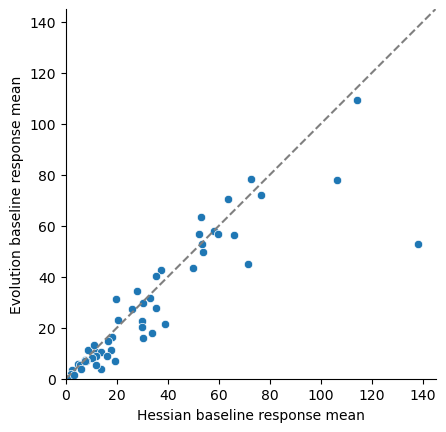

In [ ]:
hess_exp_bsl_mean = tuning_stats_synopsis_df.groupby("Exp_id")["prefchan_bsl_mean"].mean()
evol_exp_bsl_mean = evol_stats_synopsis_df.groupby("Exp_id")['bslresp_mean'].mean()
# make a dataframe with the two series
bsl_mean_df = pd.DataFrame({"hessian_bsl_mean": hess_exp_bsl_mean, "evol_bsl_mean": evol_exp_bsl_mean})

# Get max value for setting square axes limits
max_val = max(bsl_mean_df["hessian_bsl_mean"].max(), bsl_mean_df["evol_bsl_mean"].max()) * 1.05

# Create square plot with diagonal line
fig, ax = plt.subplots()
sns.scatterplot(data=bsl_mean_df, x="hessian_bsl_mean", y="evol_bsl_mean", ax=ax)
ax.plot([0, max_val], [0, max_val], '--', color='gray')
ax.set_aspect('equal')
ax.set_xlim(0, max_val)
ax.set_ylim(0, max_val)
plt.xlabel("Hessian baseline response mean")
plt.ylabel("Evolution baseline response mean")
plt.show()

In [ ]:
evol_stats_synopsis_df.columns

Index(['ChanQual', 'Exp_collection', 'Expi', 'WebCam', 'comments', 'ephysFN',
       'expControlFN', 'pref_chan', 'pref_unit', 'stim_size', 'stimuli',
       'Animal', 'prefchan', 'prefunit', 'imgpos', 'imgsize', 'GANspace1',
       'GANspace2', 'space1_cfg', 'space2_cfg', 'optimizer1', 'optimizer2',
       'optim1_cfg', 'optim2_cfg', 'init_resp_thr0', 'last_resp_thr0',
       'max_resp_thr0', 'max_evol_resp_thr0', 'max_resp_thr0_blocknum',
       'lastinit_thr0_tval', 'lastinit_thr0_pval', 'lastinit_thr0_dof',
       'maxinit_thr0_tval', 'maxinit_thr0_pval', 'maxinit_thr0_dof',
       'init_resp_thr1', 'last_resp_thr1', 'max_resp_thr1',
       'max_evol_resp_thr1', 'max_resp_thr1_blocknum', 'lastinit_thr1_tval',
       'lastinit_thr1_pval', 'lastinit_thr1_dof', 'maxinit_thr1_tval',
       'maxinit_thr1_pval', 'maxinit_thr1_dof', 'bslresp_mean', 'bslresp_std',
       'mean_ref_resp', 'max_ref_resp', 'max_ref_resp_imgname',
       'max_evol_resp', 'max_evol_resp_blockidx', 'max_evolref_

In [ ]:
tuning_stats_synopsis_df.columns # max_resp_lin_dist


Index(['space_name', 'eig_id', 'F_value', 'p_value', 'stats_str',
       'lin_dist_set', 'lin_dist_num', 'avg_resp_per_lin_dist',
       'repeat_per_lin_dist', 'max_resp_lin_dist', 'max_resp_val', 'Animal',
       'Expi', 'ephysFN', 'stimuli', 'prefchan', 'prefunit', 'prefchan_str',
       'prefchan_bsl_mean', 'prefchan_bsl_sem', 'Exp_id'],
      dtype='object')

In [ ]:
assert tuning_stats_synopsis_df.apply(lambda row: 0.0 not in row['lin_dist_set'], axis=1).sum() == 0, \
    "Some experiments do not have 0.0 in lin_dist_set at any tuning axis"
# Get the response at lin_dist=0 for each row
avg_resp_at_origin = []
for _, row in tuning_stats_synopsis_df.iterrows():
    if 0.0 in row['lin_dist_set']:
        idx = row['lin_dist_set'].index(0.0)
        avg_resp_at_origin.append(row['avg_resp_per_lin_dist'][idx])
    else:
        print(row)
        raise ValueError(f"0.0 not in lin_dist_set for {row['Exp_id']}")
tuning_stats_synopsis_df['avg_resp_at_origin'] = avg_resp_at_origin

In [ ]:
hess_exp_resp_max = tuning_stats_synopsis_df.groupby("Exp_id")["max_resp_val"].max()
hess_exp_resp_at_origin = tuning_stats_synopsis_df.groupby("Exp_id")["avg_resp_at_origin"].mean()
evol_exp_resp_last_thr1 = evol_stats_synopsis_df.groupby("Exp_id")['last_resp_thr1'].mean()
evol_exp_resp_max_thr1 = evol_stats_synopsis_df.groupby("Exp_id")['max_resp_thr1'].mean()
evol_exp_resp_max_all = evol_stats_synopsis_df.groupby("Exp_id")['max_evolref_resp'].mean()
evol_exp_resp_max_evol = evol_stats_synopsis_df.groupby("Exp_id")['max_evol_resp'].mean()
hess_exp_bsl_mean = tuning_stats_synopsis_df.groupby("Exp_id")["prefchan_bsl_mean"].mean()
evol_exp_bsl_mean = evol_stats_synopsis_df.groupby("Exp_id")['bslresp_mean'].mean()
# make a dataframe with the three series
resp_max_df = pd.DataFrame({"hessian_resp_max": hess_exp_resp_max, 
                            "hessian_resp_at_origin": hess_exp_resp_at_origin,
                            "hessian_bsl_mean": hess_exp_bsl_mean,
                            "evol_resp_last_thr1": evol_exp_resp_last_thr1,
                            "evol_resp_max_thr1": evol_exp_resp_max_thr1,
                            "evol_resp_max_evol": evol_exp_resp_max_evol,
                            "evol_resp_max_all": evol_exp_resp_max_all,
                            "evol_bsl_mean": evol_exp_bsl_mean})

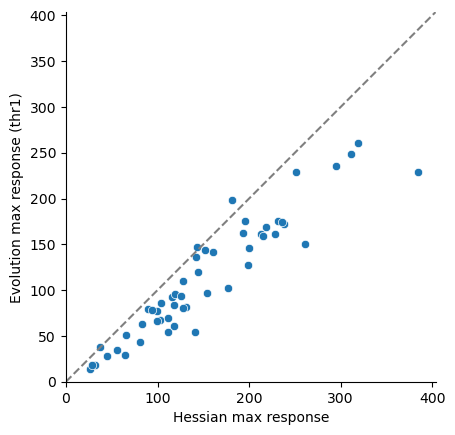

In [ ]:
# Get max value for setting square axes limits
max_val = max(resp_max_df["hessian_resp_max"].max(), resp_max_df["evol_resp_max_thr1"].max()) * 1.05
# Create square plot with diagonal line
fig, ax = plt.subplots()
sns.scatterplot(data=resp_max_df, x="hessian_resp_max", y="evol_resp_max_thr1", ax=ax)
ax.plot([0, max_val], [0, max_val], '--', color='gray')
ax.set_aspect('equal')
ax.set_xlim(0, max_val)
ax.set_ylim(0, max_val)
plt.xlabel("Hessian max response")
plt.ylabel("Evolution max response (thr1)")
plt.show()


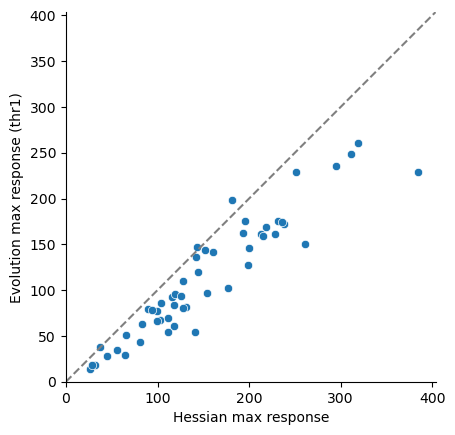

In [ ]:
hess_exp_resp_max = tuning_stats_synopsis_df.groupby("Exp_id")["max_resp_val"].max()
evol_exp_resp_max_thr1 = evol_stats_synopsis_df.groupby("Exp_id")['max_resp_thr1'].max()
evol_exp_resp_max_all = evol_stats_synopsis_df.groupby("Exp_id")['max_evolref_resp'].max()
# make a dataframe with the three series
resp_max_df = pd.DataFrame({"hessian_resp_max": hess_exp_resp_max, "evol_resp_max_thr1": evol_exp_resp_max_thr1, "evol_resp_max_all": evol_exp_resp_max_all})

# Get max value for setting square axes limits
max_val = max(resp_max_df["hessian_resp_max"].max(), resp_max_df["evol_resp_max_thr1"].max()) * 1.05
# Create square plot with diagonal line
fig, ax = plt.subplots()
sns.scatterplot(data=resp_max_df, x="hessian_resp_max", y="evol_resp_max_thr1", ax=ax)
ax.plot([0, max_val], [0, max_val], '--', color='gray')
ax.set_aspect('equal')
ax.set_xlim(0, max_val)
ax.set_ylim(0, max_val)
plt.xlabel("Hessian max response")
plt.ylabel("Evolution max response (thr1)")
plt.show()


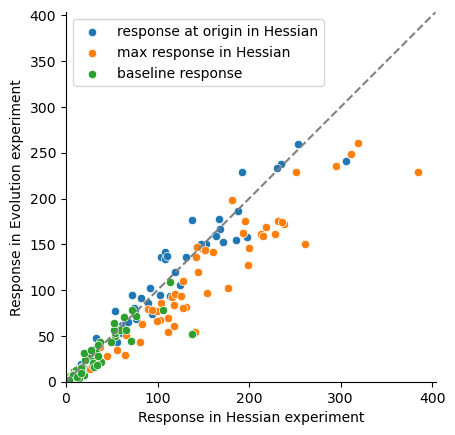

In [ ]:


# Get max value for setting square axes limits
max_val = max(resp_max_df["hessian_resp_at_origin"].max(), 
              resp_max_df["evol_resp_last_thr1"].max(),
              resp_max_df["hessian_resp_max"].max(),
              resp_max_df["evol_resp_max_thr1"].max(),
              ) * 1.05
# Create square plot with diagonal line
fig, ax = plt.subplots()
sns.scatterplot(data=resp_max_df, x="hessian_resp_at_origin", y="evol_resp_last_thr1", ax=ax, )
sns.scatterplot(data=resp_max_df, x="hessian_resp_max", y="evol_resp_max_thr1", ax=ax, )
sns.scatterplot(data=resp_max_df, x="hessian_bsl_mean", y="evol_bsl_mean", ax=ax, )
ax.plot([0, max_val], [0, max_val], '--', color='gray')
ax.set_aspect('equal')
ax.set_xlim(0, max_val)
ax.set_ylim(0, max_val)
plt.legend(["response at origin in Hessian", "max response in Hessian", "baseline response"])
plt.xlabel("Response in Hessian experiment")
plt.ylabel("Response in Evolution experiment")
plt.show()


#### Final comparison of Hessian and Evolution experiment pairs

In [ ]:
# import pearsonr and r2
from scipy.stats import pearsonr
def compute_r2(true_y, pred_y):
    return 1 - np.sum((true_y - pred_y)**2) / np.sum((true_y - np.mean(true_y))**2)
    

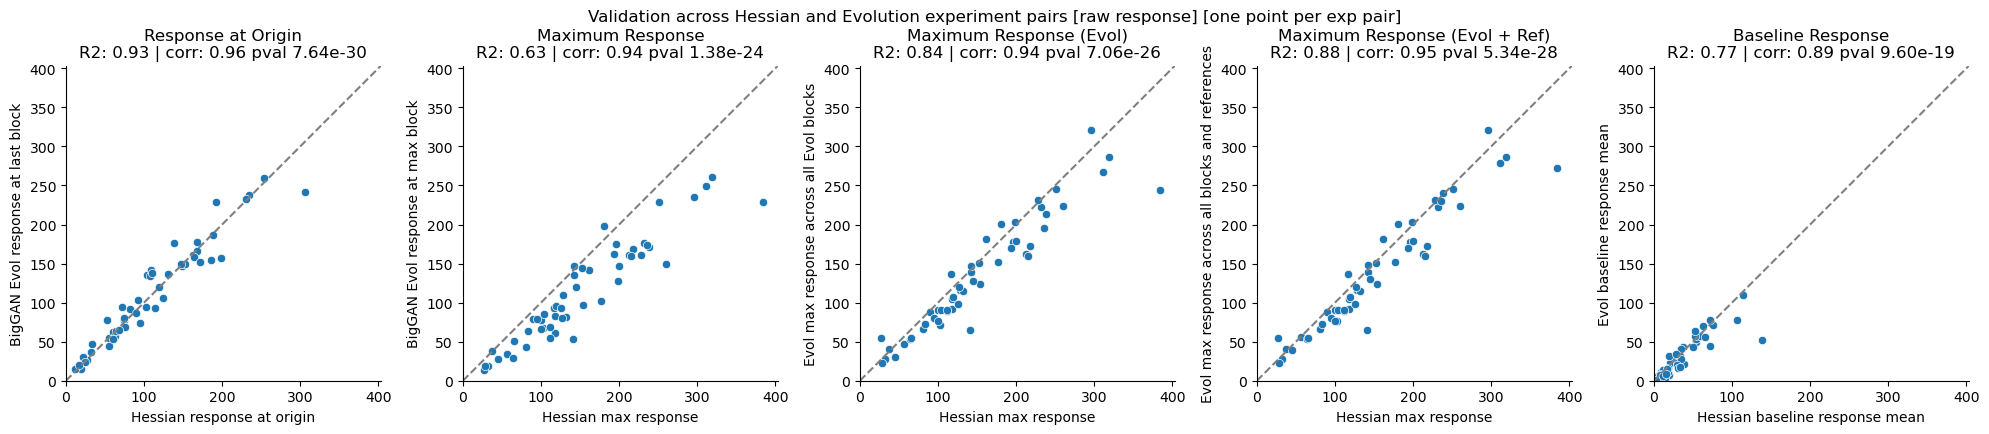

In [ ]:
# Get max value for setting square axes limits
max_val = max(resp_max_df["hessian_resp_at_origin"].max(), 
              resp_max_df["evol_resp_last_thr1"].max(),
              resp_max_df["hessian_resp_max"].max(), 
              resp_max_df["evol_resp_max_thr1"].max(),
              ) * 1.05

# Create three panel plot
fig, axes = plt.subplots(1, 5, figsize=(20, 4.5))
# Define plot parameters
plot_params = [
    {
        'x': 'hessian_resp_at_origin',
        'y': 'evol_resp_last_thr1',
        'xlabel': 'Hessian response at origin',
        'ylabel': 'BigGAN Evol response at last block',
        'title': 'Response at Origin'
    },
    {
        'x': 'hessian_resp_max', 
        'y': 'evol_resp_max_thr1',
        'xlabel': 'Hessian max response',
        'ylabel': 'BigGAN Evol response at max block',
        'title': 'Maximum Response'
    },
    {
        'x': 'hessian_resp_max', 
        'y': 'evol_resp_max_evol',
        'xlabel': 'Hessian max response',
        'ylabel': 'Evol max response across all Evol blocks',
        'title': 'Maximum Response (Evol)'
    },
    {
        'x': 'hessian_resp_max', 
        'y': 'evol_resp_max_all',
        'xlabel': 'Hessian max response',
        'ylabel': 'Evol max response across all blocks and references',
        'title': 'Maximum Response (Evol + Ref)'
    },
    {
        'x': 'hessian_bsl_mean',
        'y': 'evol_bsl_mean', 
        'xlabel': 'Hessian baseline response mean',
        'ylabel': 'Evol baseline response mean',
        'title': 'Baseline Response'
    }
]

# Create each subplot
for ax, params in zip(axes, plot_params):
    sns.scatterplot(data=resp_max_df, x=params['x'], y=params['y'], ax=ax)
    # compute R2 and pearson correlation
    corr, pval = pearsonr(resp_max_df[params['x']], resp_max_df[params['y']])
    r2 = compute_r2(resp_max_df[params['x']], resp_max_df[params['y']])
    ax.plot([0, max_val], [0, max_val], '--', color='gray')
    ax.set_aspect('equal')
    ax.set_xlim(0, max_val)
    ax.set_ylim(0, max_val)
    ax.set_title(params['title']+f"\nR2: {r2:.2f} | corr: {corr:.2f} pval {pval:.2e}")
    ax.set_xlabel(params['xlabel']) # Hessian response
    ax.set_ylabel(params['ylabel']) # Evolution response

plt.tight_layout()
plt.suptitle("Validation across Hessian and Evolution experiment pairs [raw response] [one point per exp pair]")
saveallforms(synfigdir, "Hessian_Evolution_response_cross_validation", figh=fig)
plt.show()
